In [18]:
# ========================
# 1. Import Libraries
# ========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# ========================
# 2. Load Dataset
# ========================

import pandas as pd

import os

# In a notebook, this gets the folder where your notebook is currently running
root_dir = os.getcwd() 

# Join it to your data folder (Make sure 'Data' matches your folder name exactly)
data_path = os.path.join(root_dir, 'Data', 'Dataset_ATS_v2.csv')


# Load the dataset
df = pd.read_csv(data_path)

# Display the first few rows to understand the structure of the data
print(df.head())


c:\Users\bijay\OneDrive\Desktop\Customer churn analysis\Data_Preparation\Data\Dataset_ATS_v2.csv
   gender  SeniorCitizen Dependents  tenure PhoneService MultipleLines  \
0  Female              0         No       1           No            No   
1    Male              0         No      41          Yes            No   
2  Female              0        Yes      52          Yes            No   
3  Female              0         No       1          Yes            No   
4    Male              0         No      67          Yes            No   

  InternetService        Contract  MonthlyCharges Churn  
0             DSL  Month-to-month              25   Yes  
1             DSL        One year              25    No  
2             DSL  Month-to-month              19    No  
3             DSL        One year              76   Yes  
4     Fiber optic  Month-to-month              51    No  


In [13]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender             0
SeniorCitizen      0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
Contract           0
MonthlyCharges     0
Churn              0
dtype: int64


In [16]:
# ========================
# Missing Value Handling
# ========================

# Check total missing values
missing_summary = df.isnull().sum()

# Display columns with missing values (if any)
missing_summary = missing_summary[missing_summary > 0]
print("\nColumns with Missing Values:")
print(missing_summary)

# Since this dataset has no missing values, no imputation is required
# If missing values existed, we could use:
# - Mean/median for numerical features
# - Mode for categorical features



Columns with Missing Values:
Series([], dtype: int64)


In [17]:
# 3. Detect Categorical Columns
# ========================
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns.append('SeniorCitizen')

print("Categorical columns detected:", categorical_columns)


Categorical columns detected: ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'Churn', 'SeniorCitizen']


C:\Users\bijay\AppData\Local\Temp\ipykernel_48000\3776019033.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()


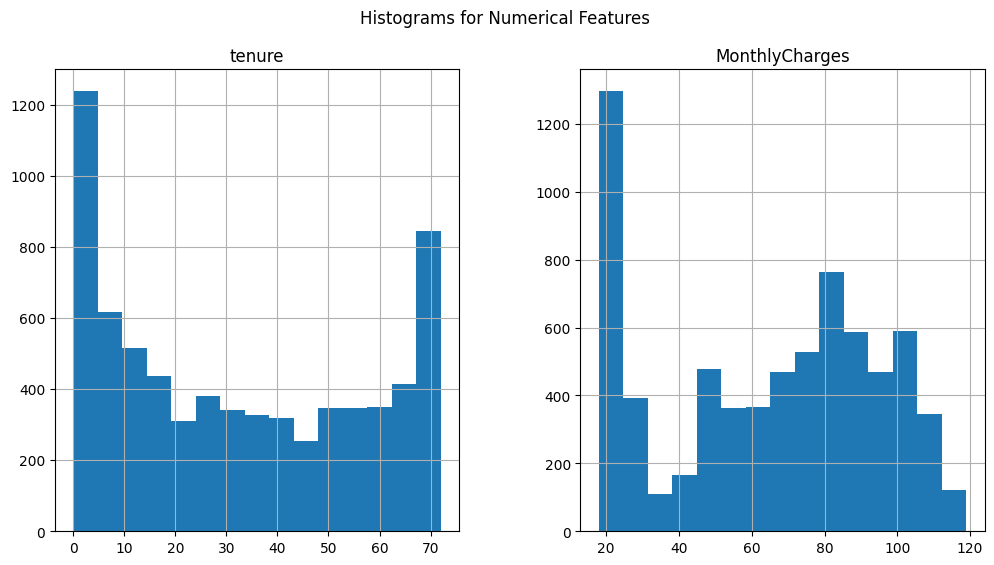

In [19]:
# Plot histogram for numerical variables
numerical_cols = ['tenure', 'MonthlyCharges']
df[numerical_cols].hist(bins=15, figsize=(12, 6))
plt.suptitle("Histograms for Numerical Features")
plt.show()


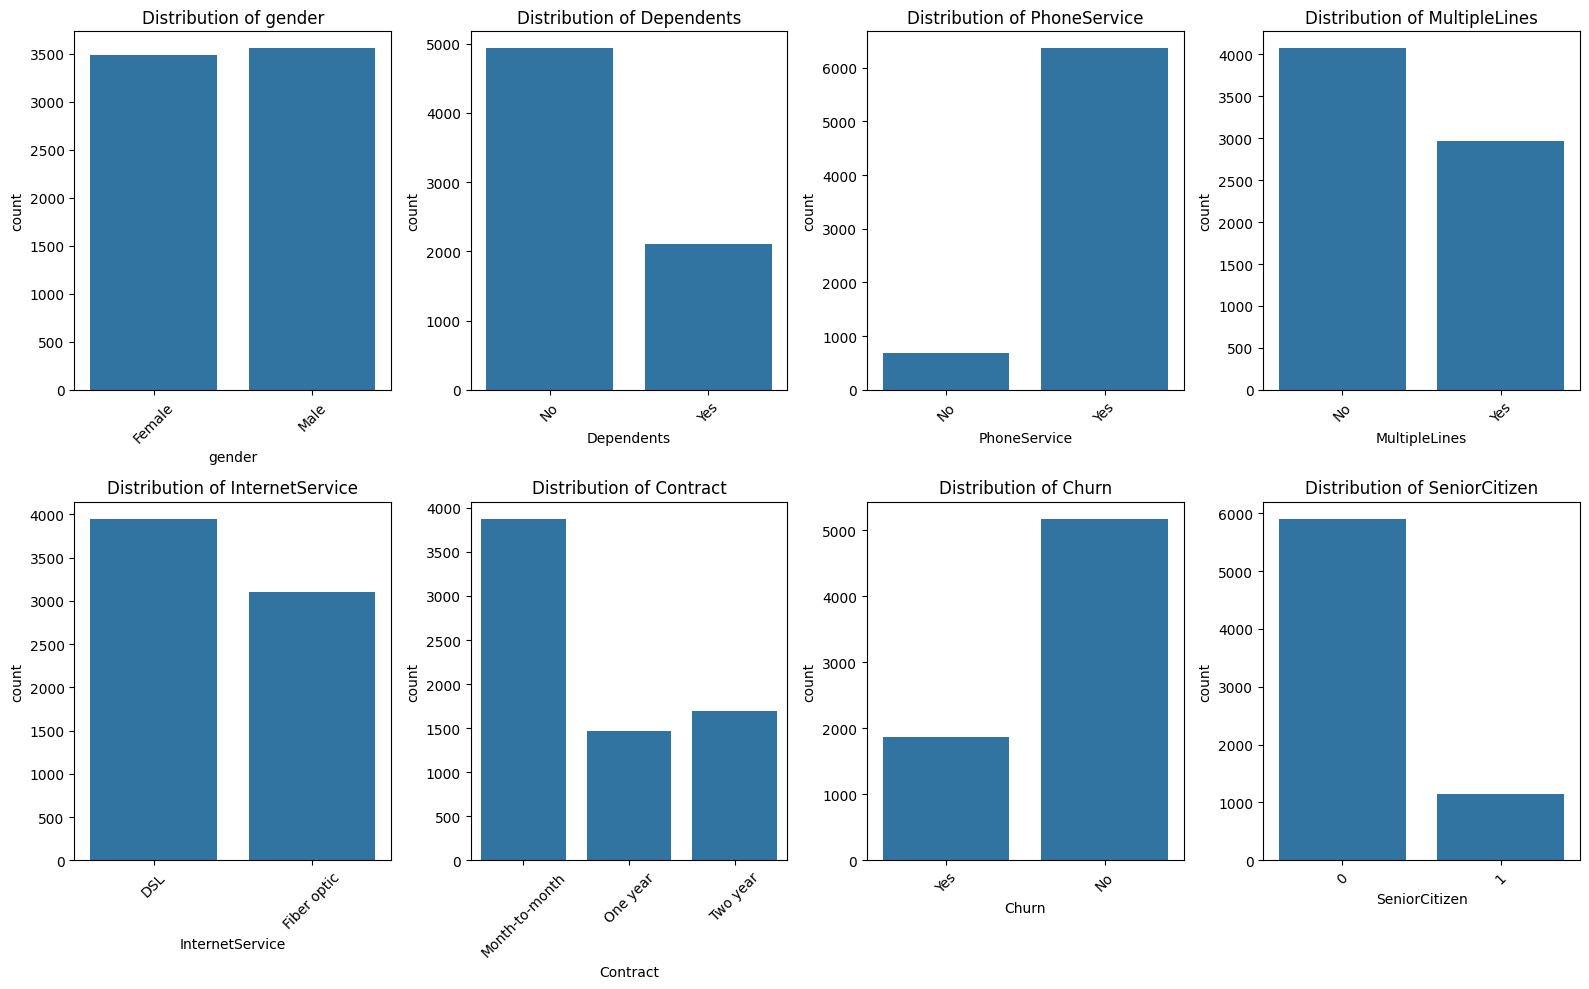

In [20]:
# 4. Visualize Categorical Columns
# ========================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 4, i)  # Adjust rows/cols if you have more than 8 columns
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

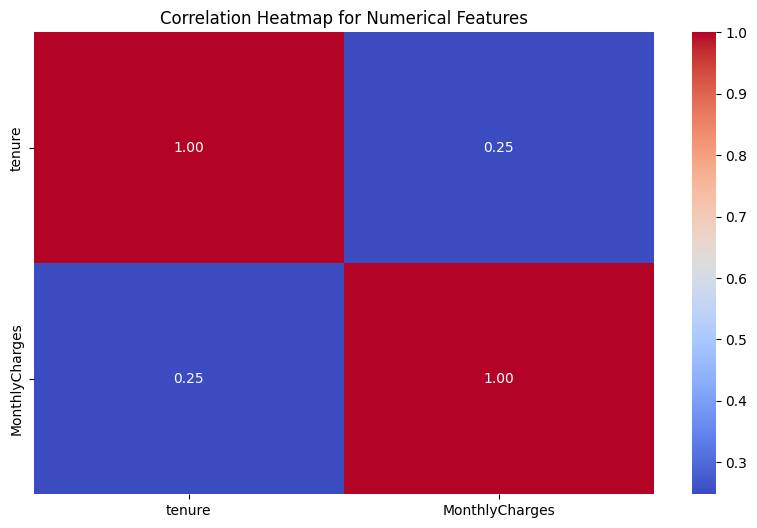

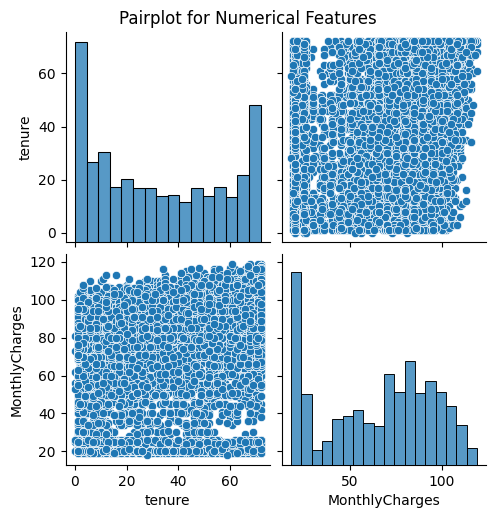

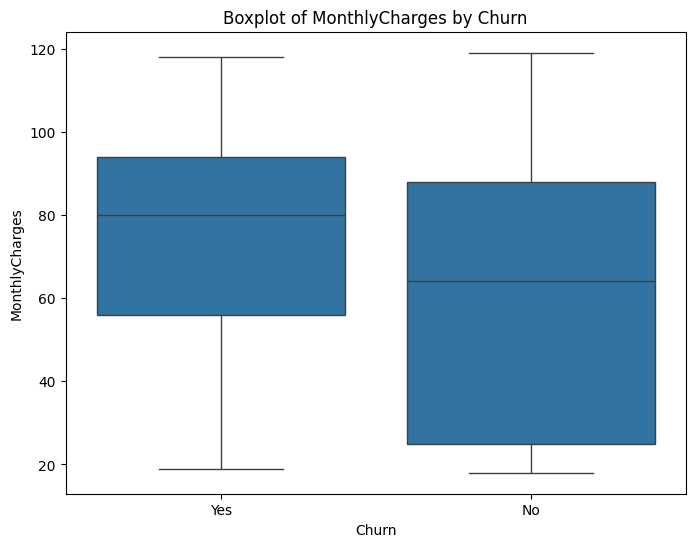

In [21]:
# ========================
# 5. Bivariate Analysis
# ========================

# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

# Pairplot to visualize relationships between numerical variables
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairplot for Numerical Features", y=1.02)
plt.show()

# Boxplot to compare 'MonthlyCharges' across 'Churn' (categorical feature)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Boxplot of MonthlyCharges by Churn")
plt.show()

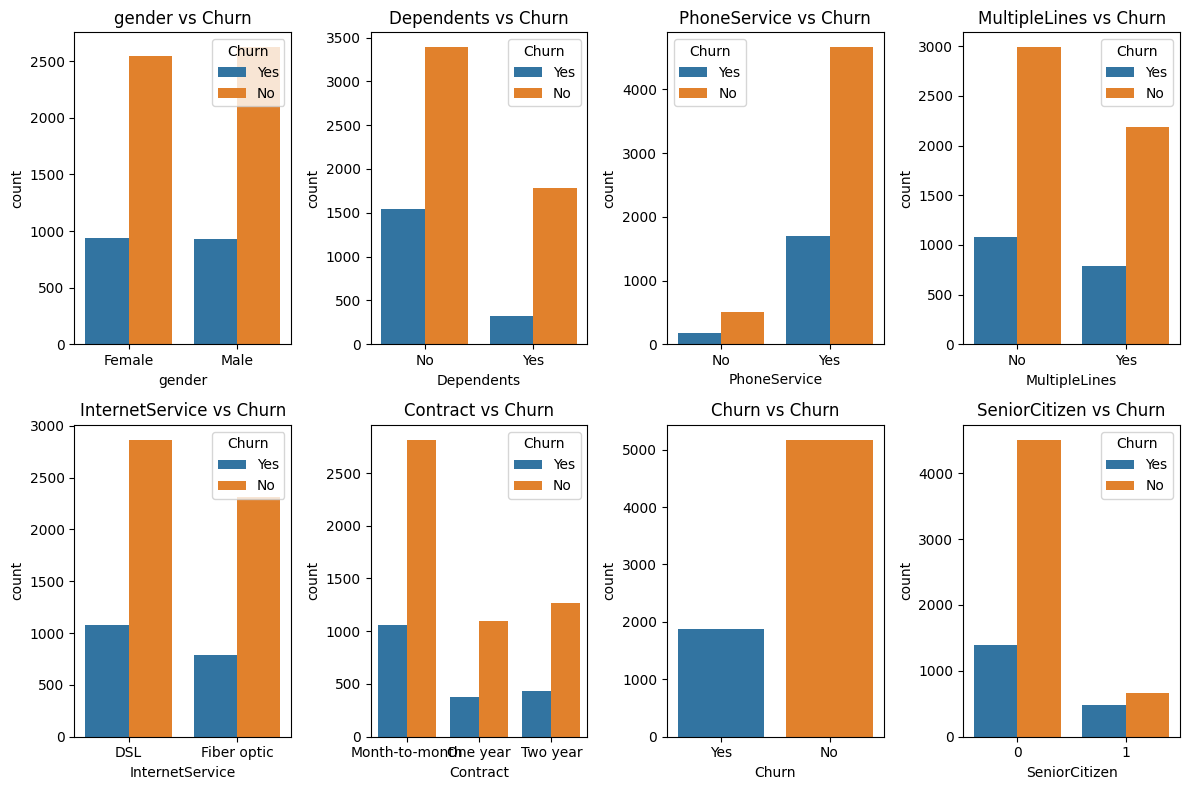

In [20]:
# ========================
# 6. Feature Relationships
# ========================

# Countplot for Churn vs. Categorical Features
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

In [21]:
# ========================
# 4. Encode Categorical Variables
# ========================

from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Separate target variable
y = df['Churn'].map({'No': 0, 'Yes': 1})
df = df.drop('Churn', axis=1)

# Binary categorical columns
binary_cols = ['gender', 'PhoneService', 'MultipleLines', 'Dependents']

# Encode binary columns
for col in binary_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1})

# One-hot encode multi-class categorical columns
df = pd.get_dummies(
    df,
    columns=['InternetService', 'Contract'],
    drop_first=True
)

# Add Churn back
df['Churn'] = y

# Check final structure
print(df.head())
df.info()

df.info()

   gender  SeniorCitizen  Dependents  tenure  PhoneService  MultipleLines  \
0       0              0           0       1             0              0   
1       1              0           0      41             1              0   
2       0              0           1      52             1              0   
3       0              0           0       1             1              0   
4       1              0           0      67             1              0   

   MonthlyCharges  InternetService_Fiber optic  Contract_One year  \
0              25                        False              False   
1              25                        False               True   
2              19                        False              False   
3              76                        False               True   
4              51                         True              False   

   Contract_Two year  Churn  
0              False      1  
1              False      0  
2              False      0  
3 

In [22]:
# ========================
# 7. K-Means Clustering with All Features
# ========================

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Use all columns for clustering (excluding 'Churn' column)
X_clustering = df.drop('Churn', axis=1)  # Exclude 'Churn' column for clustering

# Scaling the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)



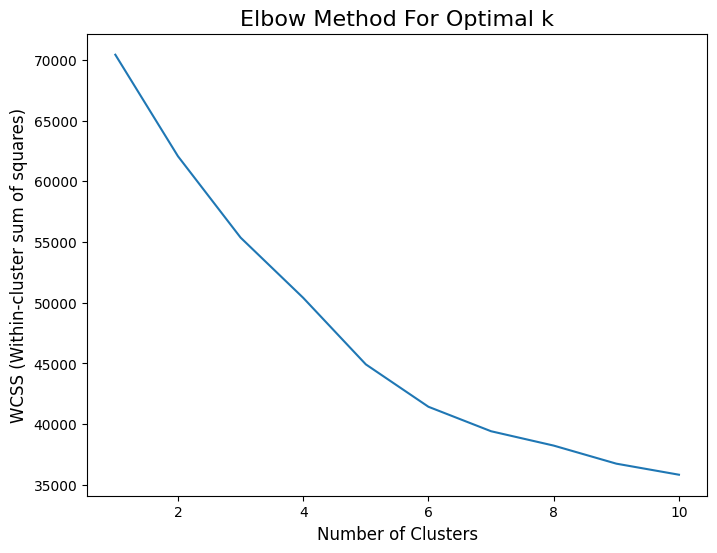

In [23]:
# ========================
# 8. Elbow Method for Optimal k
# ========================

# Find the optimal number of clusters using the Elbow Method
wcss = []  # List to store WCSS (Within-cluster sum of squares)
for i in range(1, 11):  # Try cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plotting the Elbow Method to find the optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method For Optimal k", fontsize=16)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("WCSS (Within-cluster sum of squares)", fontsize=12)
plt.show()


In [24]:
# ========================
# 9. Apply K-Means with Optimal k
# ========================

# Apply K-Means with the optimal k (based on the elbow plot, let's choose k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

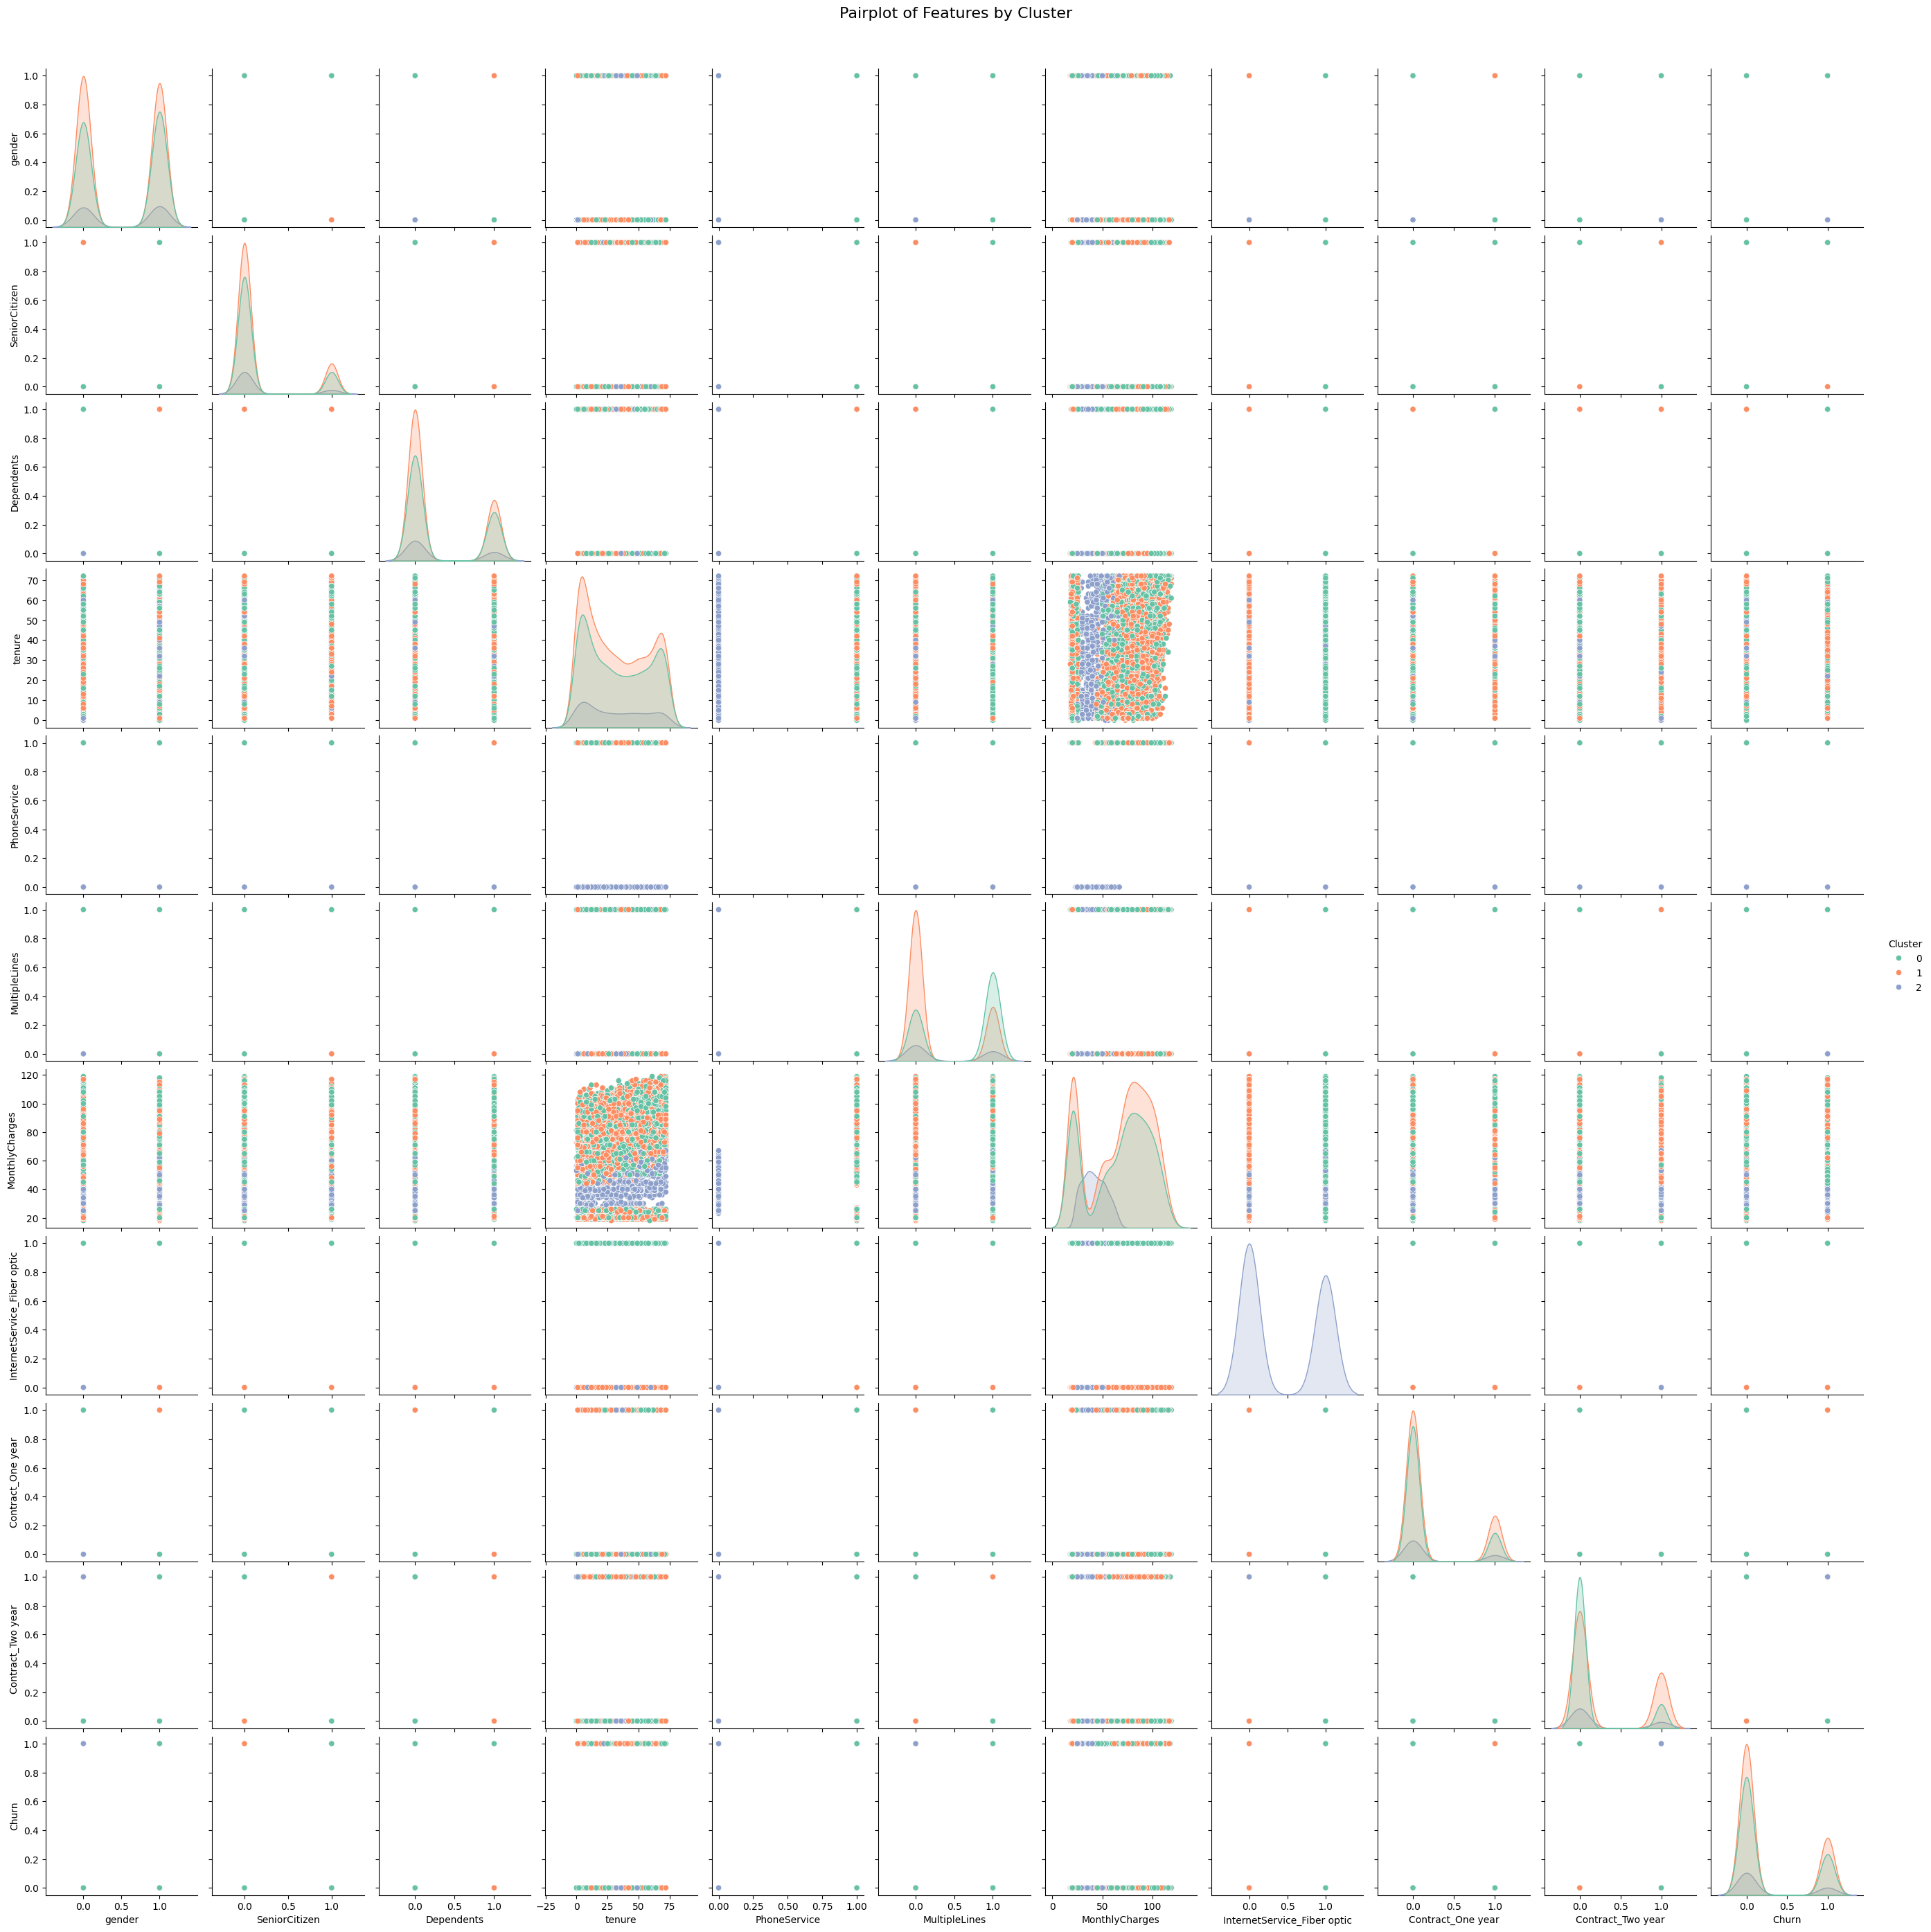

In [25]:
# ========================
# 10. Cluster Visualization (Pairplot)
# ========================

# Visualize the clusters using a pairplot (showing relationships between pairs of features)
sns.pairplot(df, hue='Cluster', vars=df.columns[:-1], palette='Set2')
plt.suptitle("Pairplot of Features by Cluster", y=1.02, fontsize=16)
plt.show()

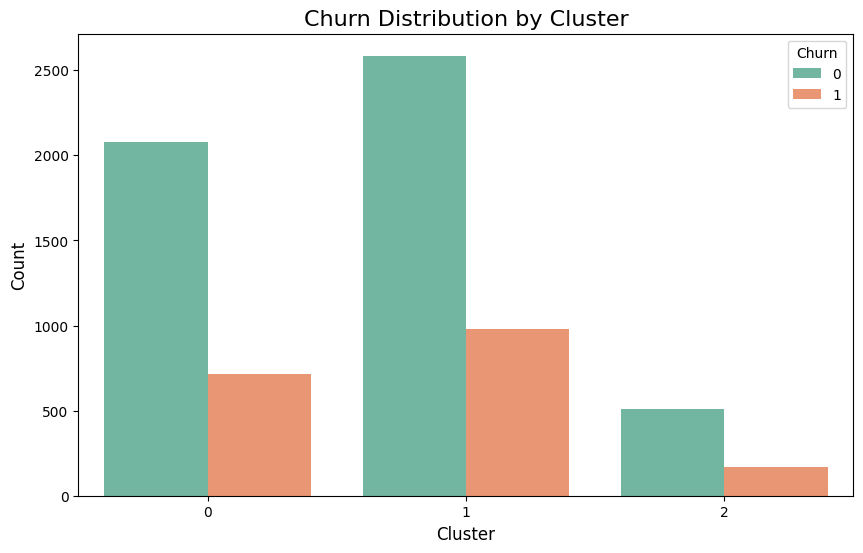

In [26]:
# ========================
# 12. Visualize Churn by Cluster
# ========================

# Visualize churn distribution by cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Churn', data=df, palette='Set2')
plt.title("Churn Distribution by Cluster", fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', loc='upper right')
plt.show()


In [39]:
# ========================
# Cluster Profiling & Labeling
# ========================

# Cluster-wise feature means
cluster_profile = df.groupby('Cluster').mean()
print("\nCluster Profiles:")
print(cluster_profile)

# Manually assign descriptive labels based on behavior
cluster_labels = {
    0: 'Medium Value – Moderate Risk',
    1: 'Low Value – Low Usage',
    2: 'High Value – High Risk'
}

df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

# Display labeled clusters
print(df[['Cluster', 'Cluster_Label']].head())



Cluster Profiles:
           gender  SeniorCitizen  Dependents     tenure  PhoneService  \
Cluster                                                                 
0        0.523792       0.157424    0.315564  33.034347           1.0   
1        0.487942       0.167695    0.286596  31.972518           1.0   
2        0.514663       0.152493    0.302053  31.737537           0.0   

         MultipleLines  MonthlyCharges  InternetService_Fiber optic  \
Cluster                                                               
0             0.632916       66.981753                     1.000000   
1             0.264162       67.365676                     0.000000   
2             0.381232       42.017595                     0.441349   

         Contract_One year  Contract_Two year     Churn  
Cluster                                                  
0                 0.173882           0.137030  0.256887  
1                 0.232754           0.321929  0.275098  
2                 0.230205 


Churn Rate by Cluster:
Churn           0         1
Cluster                    
0        0.743113  0.256887
1        0.724902  0.275098
2        0.750733  0.249267

High-Risk Customers (Cluster 0):
Total high-risk customers: 2795

Retention Strategy for High-Risk Cluster:
1. Target with personalized offers or discounts.
2. Send customized emails emphasizing benefits for long-term customers.
3. Consider loyalty programs for long-term retention.


/tmp/ipython-input-3784591908.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=high_risk_cluster, palette='Set2')


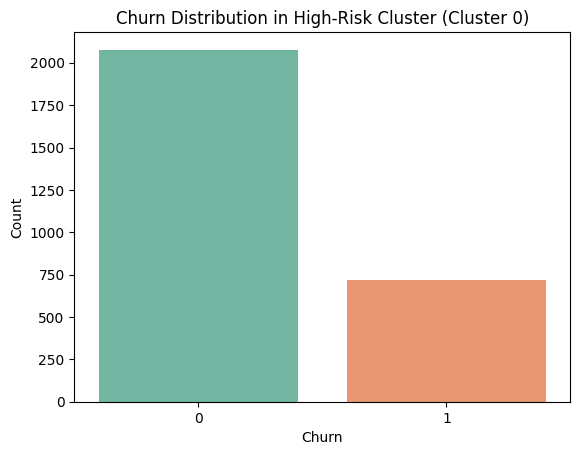

In [27]:
# ========================
# 1. Business Strategy: Churn Analysis by Cluster
# ========================

# Grouping by cluster and analyzing churn rates
cluster_churn = df.groupby('Cluster')['Churn'].value_counts(normalize=True).unstack().fillna(0)
print("\nChurn Rate by Cluster:")
print(cluster_churn)

# Identifying High-Risk / High-Value clusters (e.g., cluster with higher churn rates)
# Let's assume Cluster 0 has the highest churn rate; we can target this cluster with retention strategies
high_risk_cluster = df[df['Cluster'] == 0]

# Display strategy based on cluster
print(f"\nHigh-Risk Customers (Cluster 0):")
print(f"Total high-risk customers: {high_risk_cluster.shape[0]}")

# Business strategy for high-risk, high-value customers
print("\nRetention Strategy for High-Risk Cluster:")
print("1. Target with personalized offers or discounts.")
print("2. Send customized emails emphasizing benefits for long-term customers.")
print("3. Consider loyalty programs for long-term retention.")

# Example: Show the distribution of churn in high-risk cluster
sns.countplot(x='Churn', data=high_risk_cluster, palette='Set2')
plt.title("Churn Distribution in High-Risk Cluster (Cluster 0)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()
